GEREKLİ KÜTÜPHNELER

In [ ]:
# Veri işleme kütüphaneleri
import pandas as pd
import numpy as np

# Veri görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns

# Makine öğrenmesi kütüphaneleri
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import pandas as pd

# Veriyi yükleyelim
df = pd.read_csv('tmdb_5000_movies.csv')

# İlk birkaç satırı görelim
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
# Veri setinin sütunlarını ve türlerini kontrol edelim
df.info()

# Veri setindeki eksik değerleri kontrol edelim
df.isnull().sum()

# Veri setinde sayısal kolonların temel istatistiklerine bakalım
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


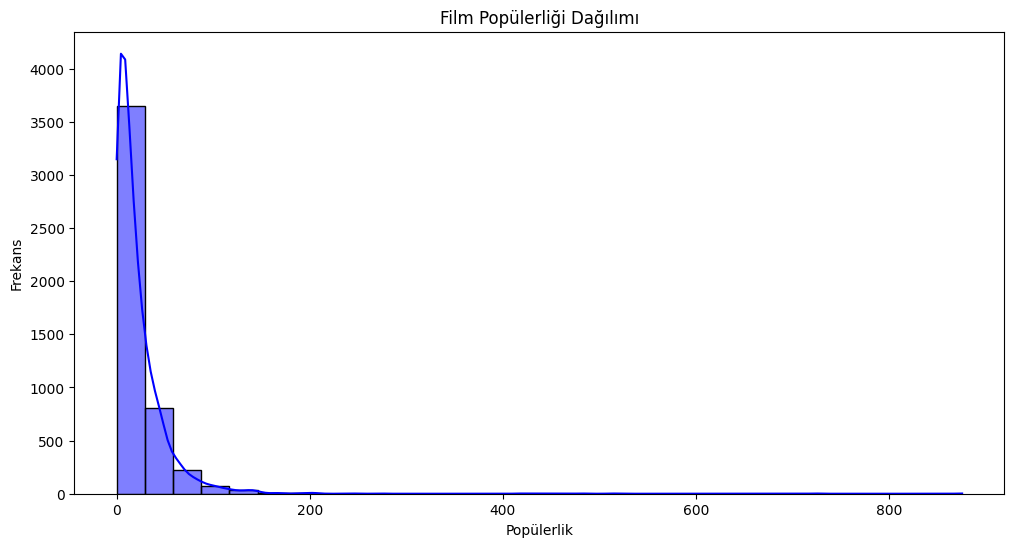

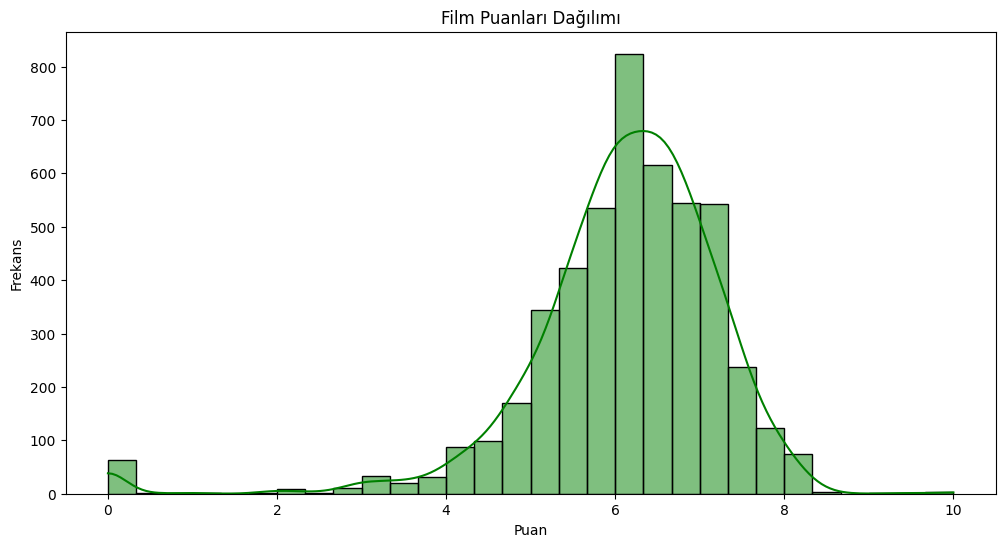

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Popülerlik (popularity) ve Puan (vote_average) dağılımlarını çizelim
plt.figure(figsize=(12, 6))
sns.histplot(df['popularity'], kde=True, color='blue', bins=30)
plt.title('Film Popülerliği Dağılımı')
plt.xlabel('Popülerlik')
plt.ylabel('Frekans')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['vote_average'], kde=True, color='green', bins=30)
plt.title('Film Puanları Dağılımı')
plt.xlabel('Puan')
plt.ylabel('Frekans')
plt.show()

In [ ]:
# Eksik değerleri kontrol et
df.isnull().sum()

# Eksik değerleri dolduralım (örneğin: 'vote_average' için ortalama ile doldurma)
df['vote_average'].fillna(df['vote_average'].mean(), inplace=True)

<ipython-input-4-b5d1483bb59a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['vote_average'].fillna(df['vote_average'].mean(), inplace=True)


In [ ]:
# Örnek olarak 'genres' sütununu one-hot encoding ile dönüştürelim
df_genres = df['genres'].str.get_dummies(sep='|')
df = pd.concat([df, df_genres], axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Popülerlik ve Puanlar gibi özellikleri normalize edelim
scaler = MinMaxScaler()
df[['popularity', 'vote_average']] = scaler.fit_transform(df[['popularity', 'vote_average']])

In [ ]:
from sklearn.model_selection import train_test_split

# Bağımsız değişkenleri (features) ve bağımlı değişkeni (target) ayıralım
X = df[['popularity', 'budget', 'runtime']]  # Featurelar
y = df['vote_average']  # Hedef değişken (puanlar)

# Eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Veriyi yükleyin ve hazırlayın (X ve y tanımlanmalı)
X = df[['popularity', 'budget', 'runtime']]  # Özellikler
y = df['vote_average']  # Hedef değişken

# Eğitim ve test verilerini ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eksik değerleri dolduralım
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Veriyi ölçeklendirelim
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeli oluştur
model = LinearRegression()

# Modeli eğit
model.fit(X_train_scaled, y_train)

# Modeli test et
y_pred = model.predict(X_test_scaled)

# Sonuçları değerlendirelim
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')


Mean Absolute Error: 0.07071986563749479
Mean Squared Error: 0.01186939255381314
R2 Score: 0.21282012347474755


Model Değerlendirme

Root Mean Squared Error: 0.1089467418228427


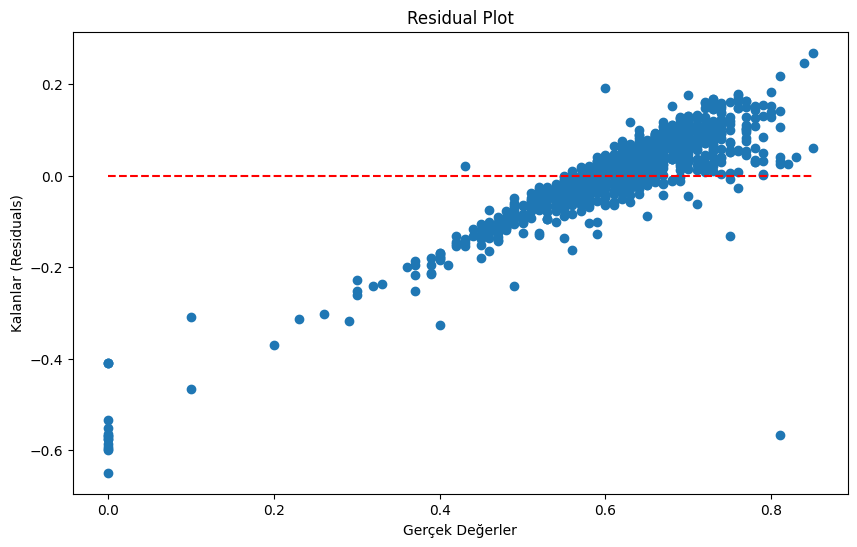

In [ ]:
# RMSE hesaplama
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test - y_pred)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors='r', linestyles='--')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Kalanlar (Residuals)')
plt.title('Residual Plot')
plt.show()


Hiperparametre Optimizasyonu

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Model ve hiperparametreler
model = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100]}

# GridSearch ile hiperparametre optimizasyonu
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# En iyi parametreleri yazdıralım
print(f'En iyi parametreler: {grid_search.best_params_}')

# En iyi modeli alalım
best_model = grid_search.best_estimator_

# Modeli test edelim
y_pred_best = best_model.predict(X_test_scaled)
print(f'R2 Score (Grid Search): {r2_score(y_test, y_pred_best)}')


En iyi parametreler: {'alpha': 0.1}
R2 Score (Grid Search): 0.2128817410487296


Modelin Sonuçlarını Görselleştirme

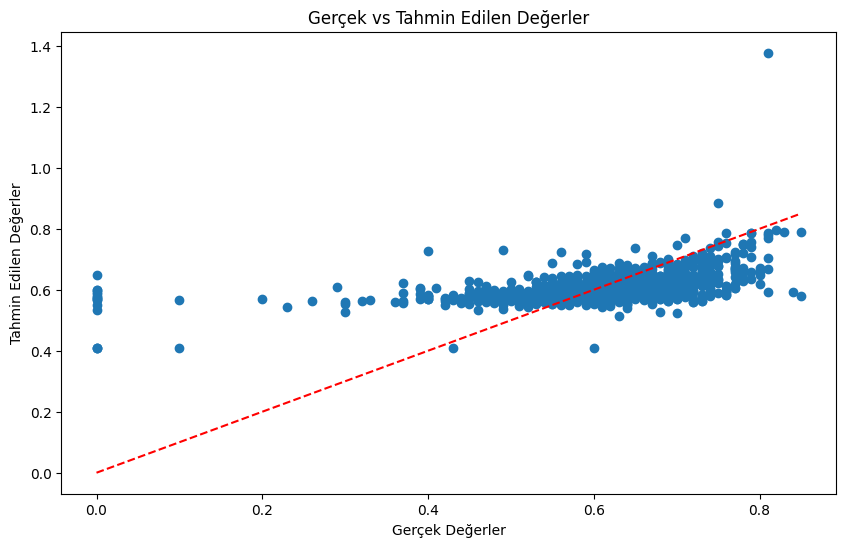

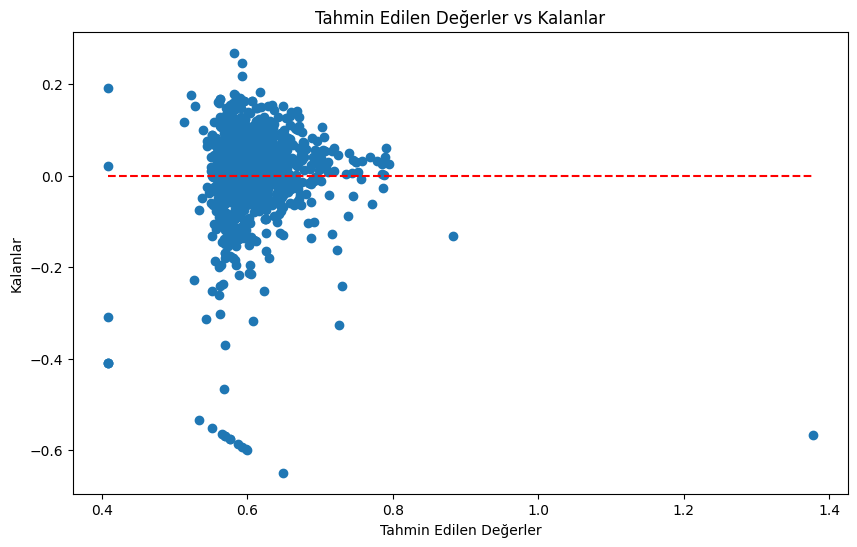

In [ ]:
# Gerçek ve tahmin edilen değerlerin karşılaştırılması
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 45 derece çizgi
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek vs Tahmin Edilen Değerler')
plt.show()

# Kalanlar (Residuals)
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='r', linestyles='--')
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Kalanlar')
plt.title('Tahmin Edilen Değerler vs Kalanlar')
plt.show()
